### Abhi Vinnakota
### Breast Cancer Image Detection Using TensorFlow and Dimension Reduction Using PCA and LDA

## Importing Libraries

In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
from glob import glob #library that helps with reading image files
import random #python random library
from skimage.io import imread #library for image reading

## Reading Dataset

In [2]:
tumorImages = glob('./16896/**/*.png', recursive = True) #reading all images in dataset

In [3]:
#creating arrays to place images in
class0 = []
class1 = []

#function to separate images of class 0 and 1, indictating benign vs. malignant
for filename in tumorImages:
    if filename.endswith("class0.png"):
        class0.append(filename)
    else:
        class1.append(filename)

In [4]:
#printing length of each array to compare number of benign vs malignant images in dataset
print("Class 0:", len(class0))
print("Class 1:", len(class1))

Class 0: 1017
Class 1: 110


### The overall breast cancer image dataset has 1127 image samples, with 1017 benign and 110 malignant samples. Therefore, the malignant samples are about 10 percent of the overall dataset, meaning that these are valuable data points. For this reason, all 1127 samples of the dataset are preprocessed during the train-test split. The dataset is a good size so there is no need for additional data cleaning. 

## Visualizing the Data

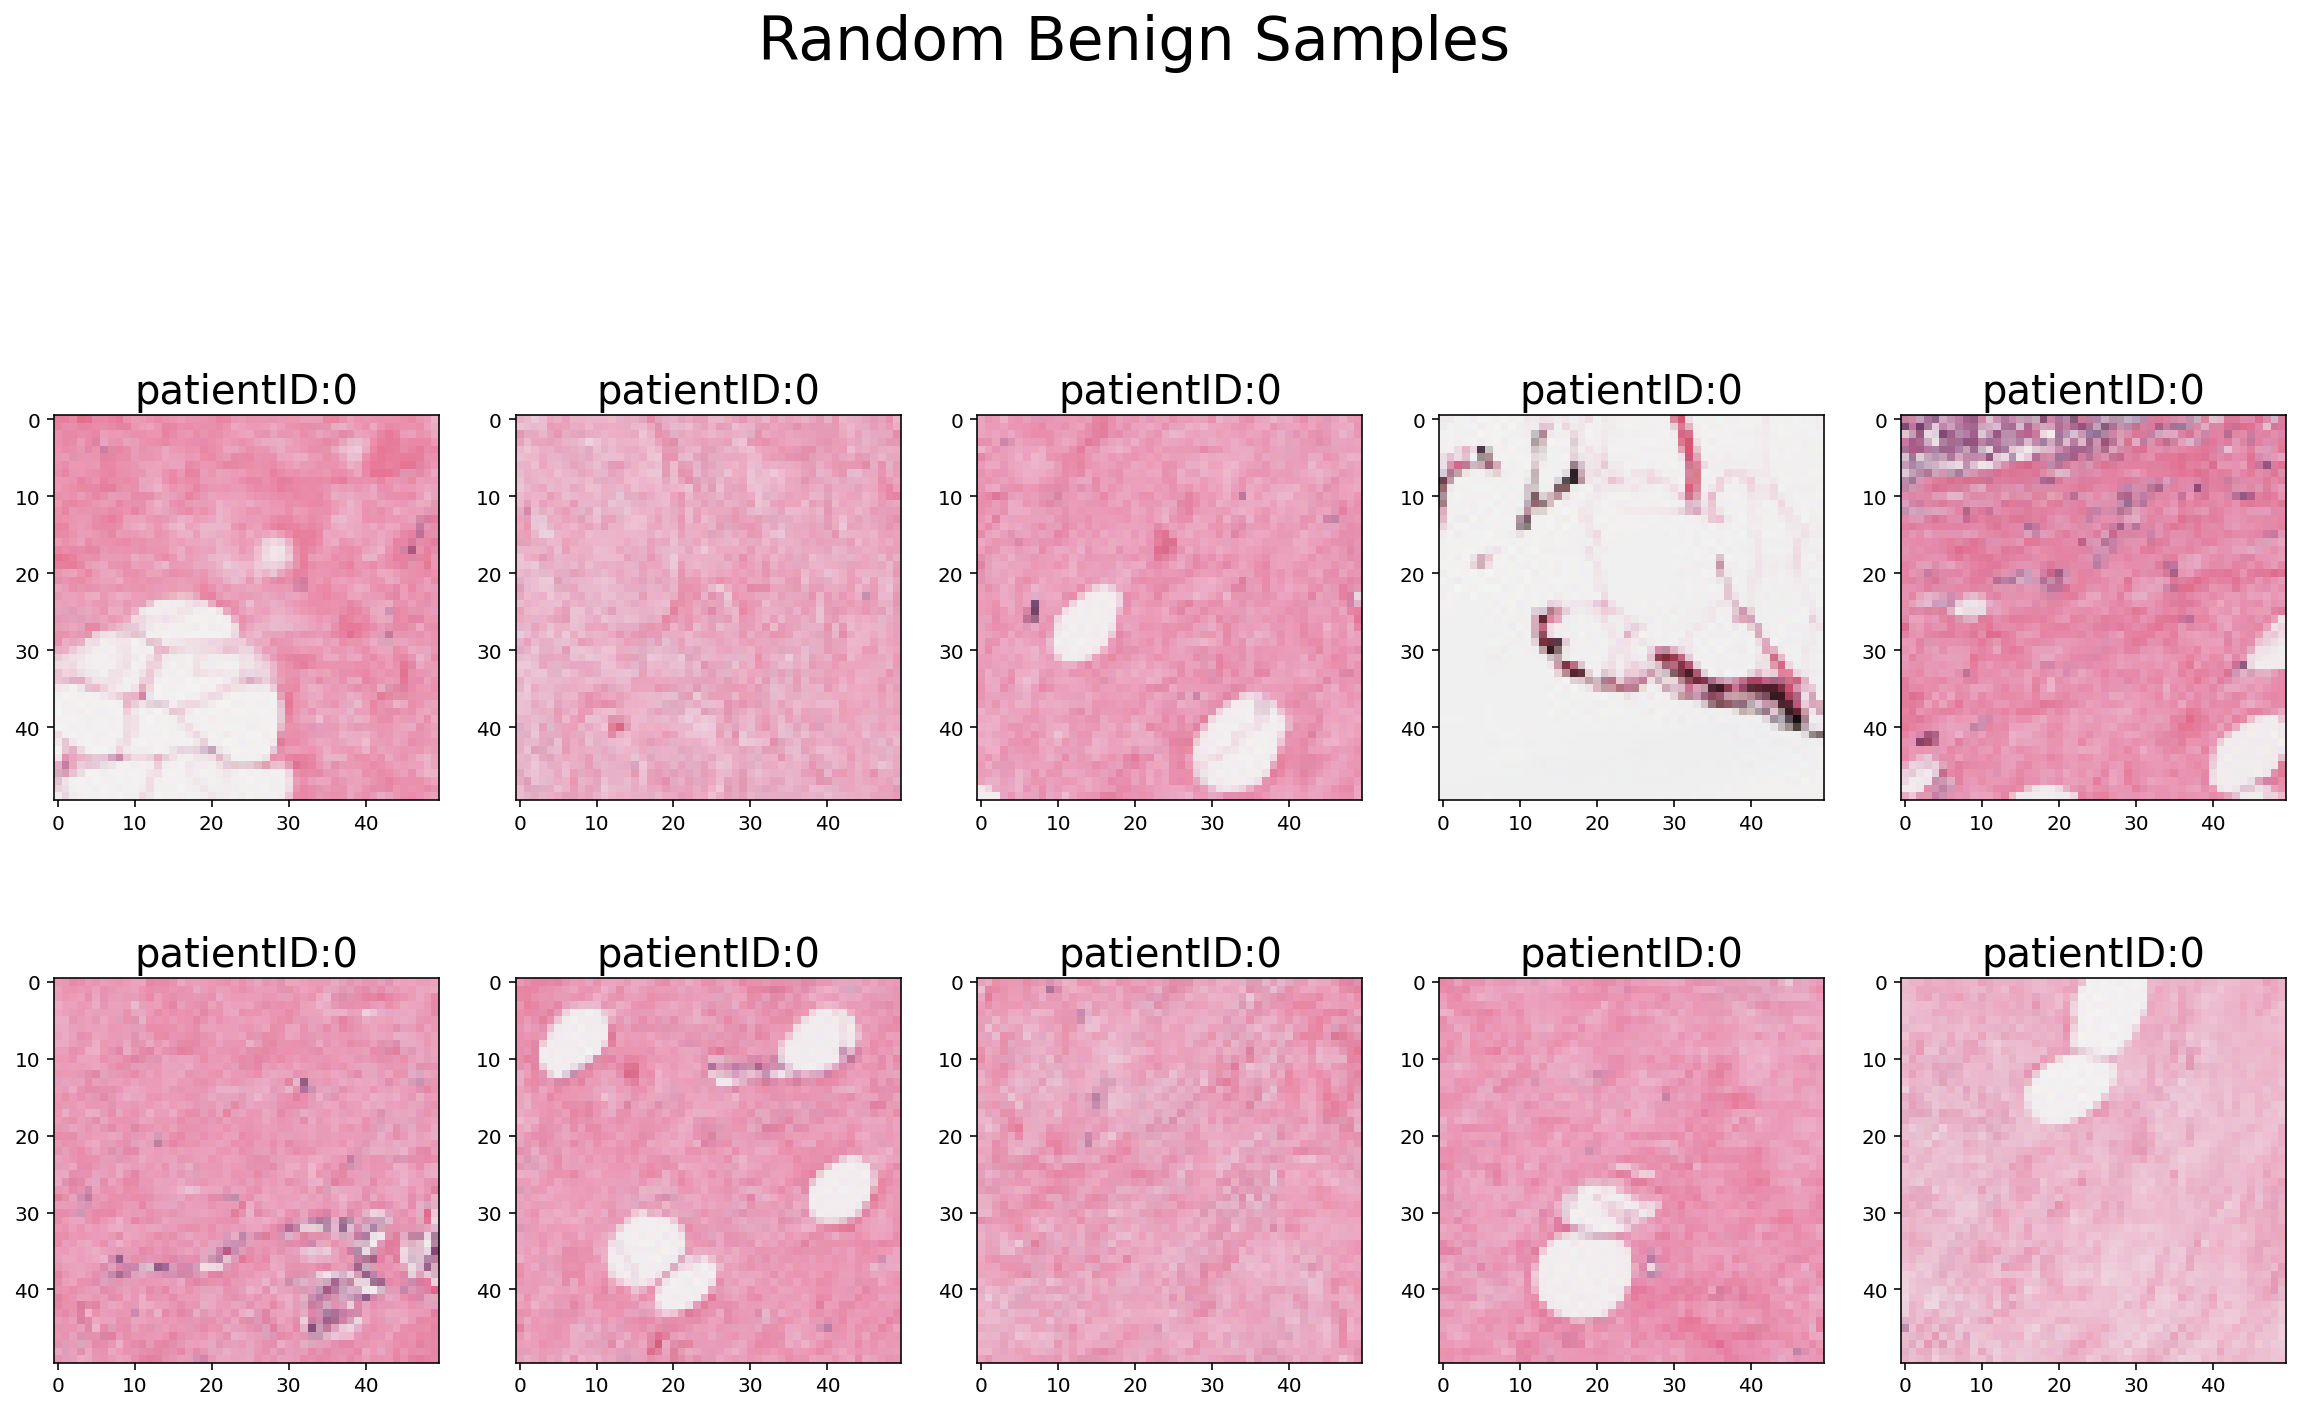

In [5]:
from random import choice #for randomly selecting the images from arrays above
fig,axes = plt.subplots(figsize=(20,25))

random_image = [choice(class0)for x in range(0,11)] #setting the length of array at 10 to print 10 images

#running a for loop for the length of above array to print each image with appropriate title
for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    axes =plt.subplot(5,5,i+1)
    axes.set_title('patientID:'+str(random_image[i][-5]),fontsize=20) #sets the title as 0 to indicate benign

fig.delaxes(axes)
fig.suptitle('Random Benign Samples',fontsize=30)
plt.show() 

### These random benign samples were plotted for demonstration purposes. It is interesting to note that they all seem to share the common characteristic of a light pink color. Visually it makes sense why they all are benign. 

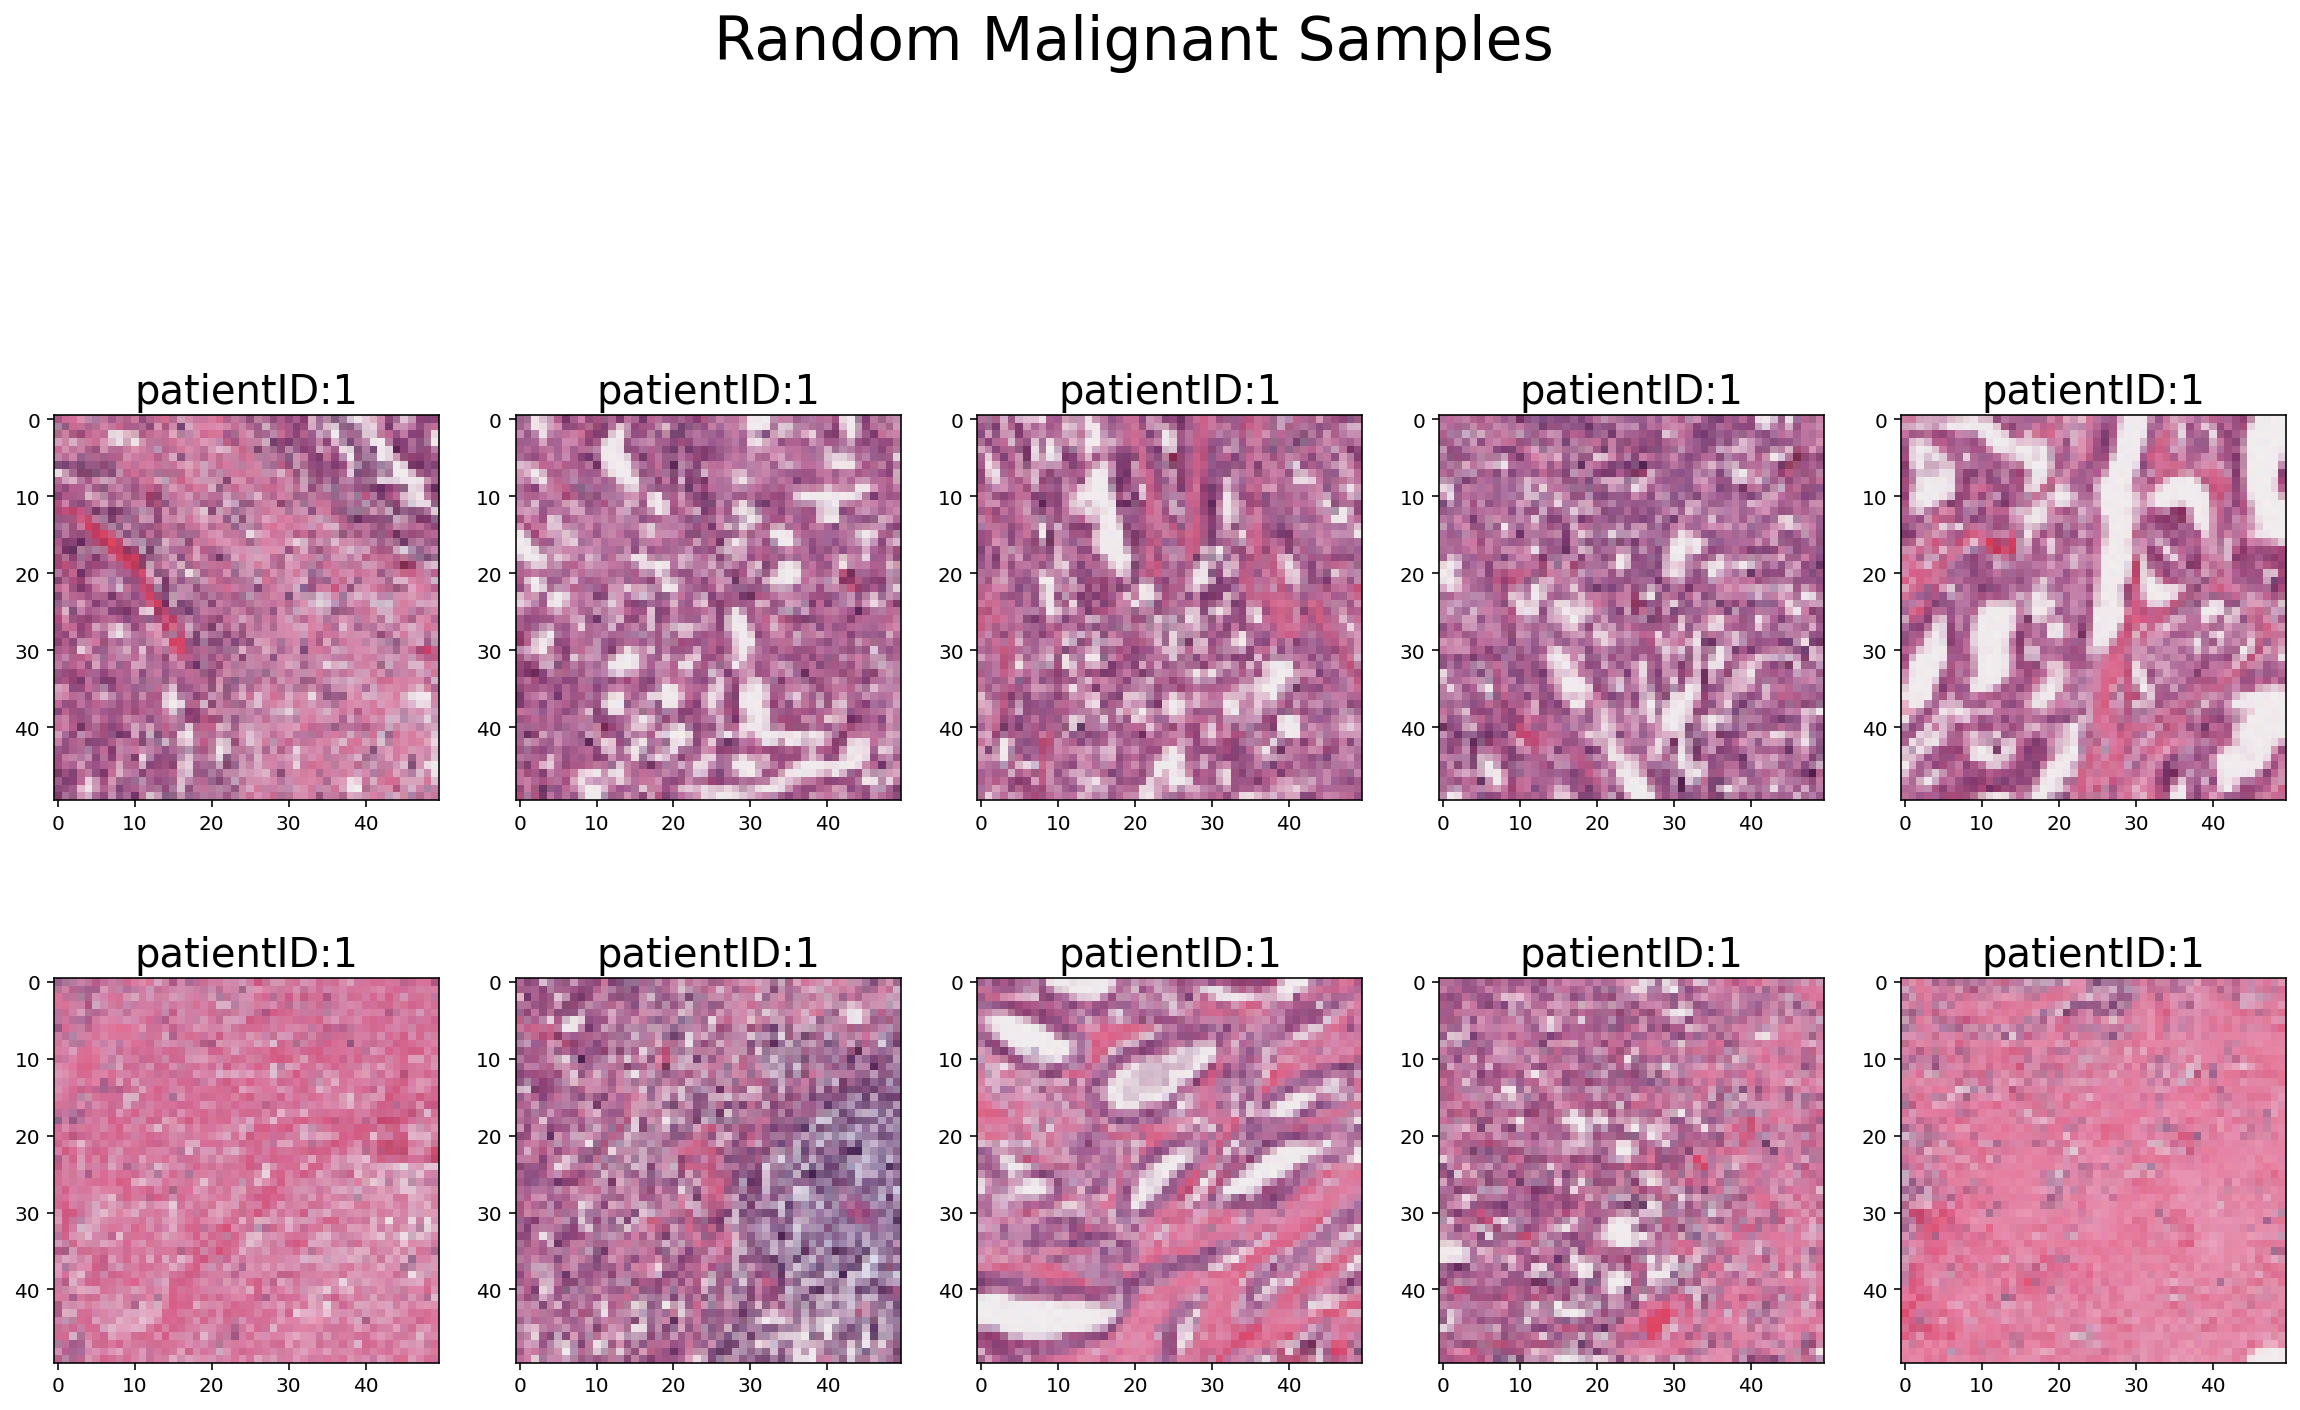

In [6]:
from random import choice #for randomly selecting images from arrays above
fig,axes = plt.subplots(figsize=(20,25))
  
random_image = [choice(class1)for x in range(0,11)] #setting the length of array at 10 to print 10 images

#running a for loop for the length of above array to print each image with appropriate title
for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    axes =plt.subplot(5,5,i+1)
    axes.set_title('patientID:'+str(random_image[i][-5]),fontsize=20) #sets the title as 1 to indicate malignant

fig.delaxes(axes)
fig.suptitle('Random Malignant Samples',fontsize=30)
plt.show() 

### These are randomly selected malignant samples. An immediate observation is that these samples are a much darker purple color compared to the benign samples. Perhaps the color of the cells/tissues plays a role in whether the cells are benign or malignant. However, this is not what we are investigating with this project, it was just something that was interesting to note. 

## Creating Train and Test Data Sets

In [7]:
#settings to prepare the neural network
batch_size = 32
#images height and width were chosen based off what we thought would be good
img_height = 180 
img_width = 180

In [8]:
#creating the train dataset
train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
  './16896',
  validation_split=0.2, #reflects a train test split of 80-20%
  subset="training",
  seed=123, #random seed number
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1127 files belonging to 2 classes.
Using 902 files for training.


In [9]:
#creating the test dataset
val_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
  './16896',
  validation_split=0.2,
  subset="validation",
  seed=123, #random seed number
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1127 files belonging to 2 classes.
Using 225 files for validation.


In [10]:
#this code was taken from tensorflow documentation and will help with shuffling the dataset
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
#rescaling input layer prior to feeding into neural network
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

## Creating Neural Network Model

In [12]:
num_classes = 2 #reflects the classes of benign vs malignant

#setting up layers of neural network with the relu activation function
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
#recording accuracy of the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training the Model

In [14]:
#setting up the model with 10 epochs
epochs=10
model_history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
29/29 [==============================] - 11s 306ms/step - loss: 0.5960 - accuracy: 0.8818 - val_loss: 0.2383 - val_accuracy: 0.9244
Epoch 2/10
29/29 [==============================] - 8s 286ms/step - loss: 0.2899 - accuracy: 0.9043 - val_loss: 0.2264 - val_accuracy: 0.9244
Epoch 3/10
29/29 [==============================] - 8s 283ms/step - loss: 0.2674 - accuracy: 0.9037 - val_loss: 0.1658 - val_accuracy: 0.9244
Epoch 4/10
29/29 [==============================] - 8s 284ms/step - loss: 0.1903 - accuracy: 0.9207 - val_loss: 0.1722 - val_accuracy: 0.9244
Epoch 5/10
29/29 [==============================] - 8s 300ms/step - loss: 0.2676 - accuracy: 0.8974 - val_loss: 0.1307 - val_accuracy: 0.9778
Epoch 6/10
29/29 [==============================] - 10s 333ms/step - loss: 0.1426 - accuracy: 0.9511 - val_loss: 0.1047 - val_accuracy: 0.9644
Epoch 7/10
29/29 [==============================] - 9s 295ms/step - loss: 0.1393 - accuracy: 0.9556 - val_loss: 0.0777 - val_accuracy: 0.9689
Epoc

## Plotting Results

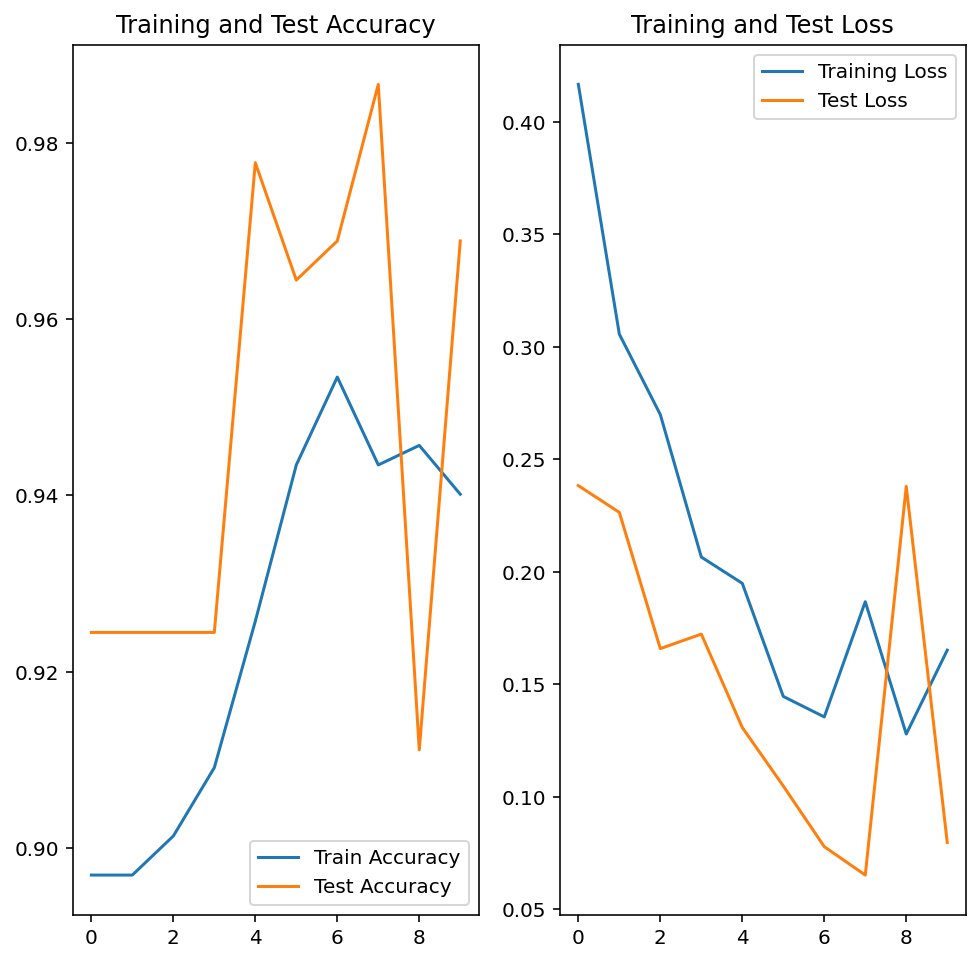

In [15]:
train_acc = model_history.history['accuracy'] #training accuracy
val_acc = model_history.history['val_accuracy'] #test accuracy

train_loss = model_history.history['loss'] #training loss
val_loss = model_history.history['val_loss'] #test loss

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

### As shown in the plots above, the train accuracy seems to be pretty close to the test accuracy, and is only a little lower at each epoch. There are a couple spots where the difference in accuracy is larger than others. However, overall the model returned a relatively high training accuracy above 90% at most spots. The plot does not seem to suggest overfitting at all, which is good because it means that the model can generalize well. 

## Predicting on New Data

In [16]:
image = tensorflow.keras.preprocessing.image.load_img('./16167/1/16167_idx5_x2351_y1601_class1.png', target_size=(img_height, img_width)) #loading image from outside training dataset
images = tensorflow.keras.preprocessing.image.img_to_array(image) #preprocessing image
images = tf.expand_dims(images, 0) 

predictions = model.predict(images) #predicting image with neural network model trained previously
score = tf.nn.softmax(predictions[0])
string = random_image[np.argmax(score)] #storing the prediction result
output = ""
#conditional statement to check whether the prediction has class 0 to indicate benign or class 1 to indicate malignant
if (string[-5] == "0"):

    output = "benign"

else:
    output = "malignant"
#printing result of the prediction with confidence score
print(
    "This image is most likely {} with a {:.2f} percent confidence."
    .format(output, 100 * np.max(score))
)

This image is most likely malignant with a 96.77 percent confidence.


### After testing the model on a sample from outside of the training dataset, it is evident that it works very well. The percent confidence is very high and the model is able to correctly predict that the image is benign. Overall, we are satisfied with our results and think that they turned out well. To improve the model in the future, it may help to introduce more samples and maybe increase the amount of malignant samples. Also, we could've experimented more with the number of layers and type of activation function used instead of just using one from a tensorflow example. Nonetheless, the model worked very well with the image dataset we used. 

## This is the second part of our project
### In this section, we used PCA and LDA to train a Logistic Regression model to classify a given tumor as benign or malignant. To train the model, the data included various quantitative values of a given tumor.

In [17]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [19]:
#importing the dataset
data_df = pd.read_csv('./data.csv')
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
#Drops columns that do not contribute to the data
data_df = data_df.drop(['Unnamed: 32','id'], axis = 1)
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Here we divide the dataset into the mean values, the standard error values, and the worst/largest values

In [21]:
#mean values in the dataset
data_df_mean = data_df.filter(['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','diagnosis'],axis = 1)
data_df_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


In [22]:
#Standard error values in the dataset
data_df_se = data_df.filter(['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se',],axis = 1)
data_df_se.head()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [23]:
#worst/largest values in the dataset
data_df_worst = data_df.filter(['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'],axis = 1)
data_df_worst.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### As the mean values are the most representative of the tumor, we used the means dataframe to run our classifcation algorithm

In [24]:
#Prints the total number of values in the means dataframe
data_df_mean.shape

(569, 11)

In [25]:
#Finds the number of datapoints representing malignant tumors and the number of data points representing benign tumors
m = 0
b = 0

for i in data_df_mean['diagnosis']:
    if i is "M":
        m = m+1
    elif i is "B":
        b = b+1

In [26]:
#printing length of each array to compare number of benign vs malignant images in dataset
print("Malignant:", m)
print("Benign:", b)

Malignant: 212
Benign: 357


### We notice that of the 569 values in the dataset, 212 represent malignant tumors, which is about 37% of the data of the means. This datasize is good because it allows the training algorithms to train based on both malignant tumor data and benign tumor data at an almost equal amount.

## Plots of the data to show correlation, spread, and other features of the data

Text(0.5, 0, 'Severity')

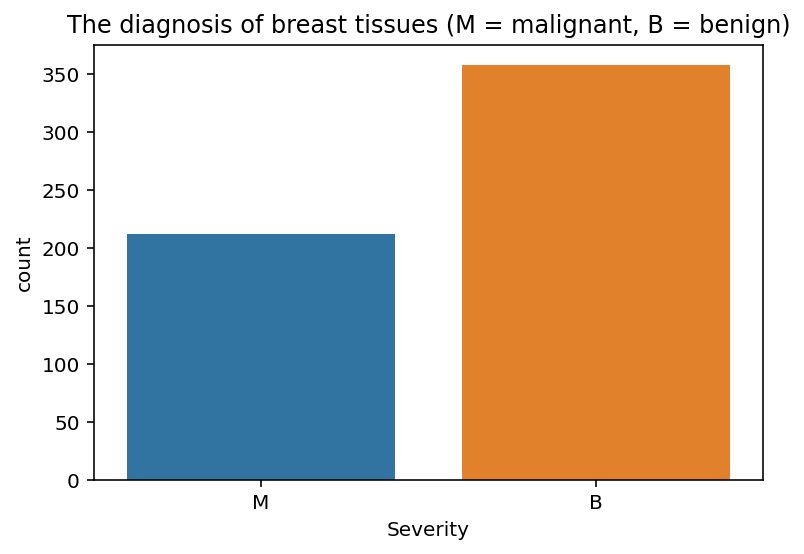

In [27]:
#Bar graph to show the number of datapoints classified as malignant and benign 
plt.title("The diagnosis of breast tissues (M = malignant, B = benign)")
sns.countplot(data_df["diagnosis"])
plt.xlabel("Severity")

<AxesSubplot:>

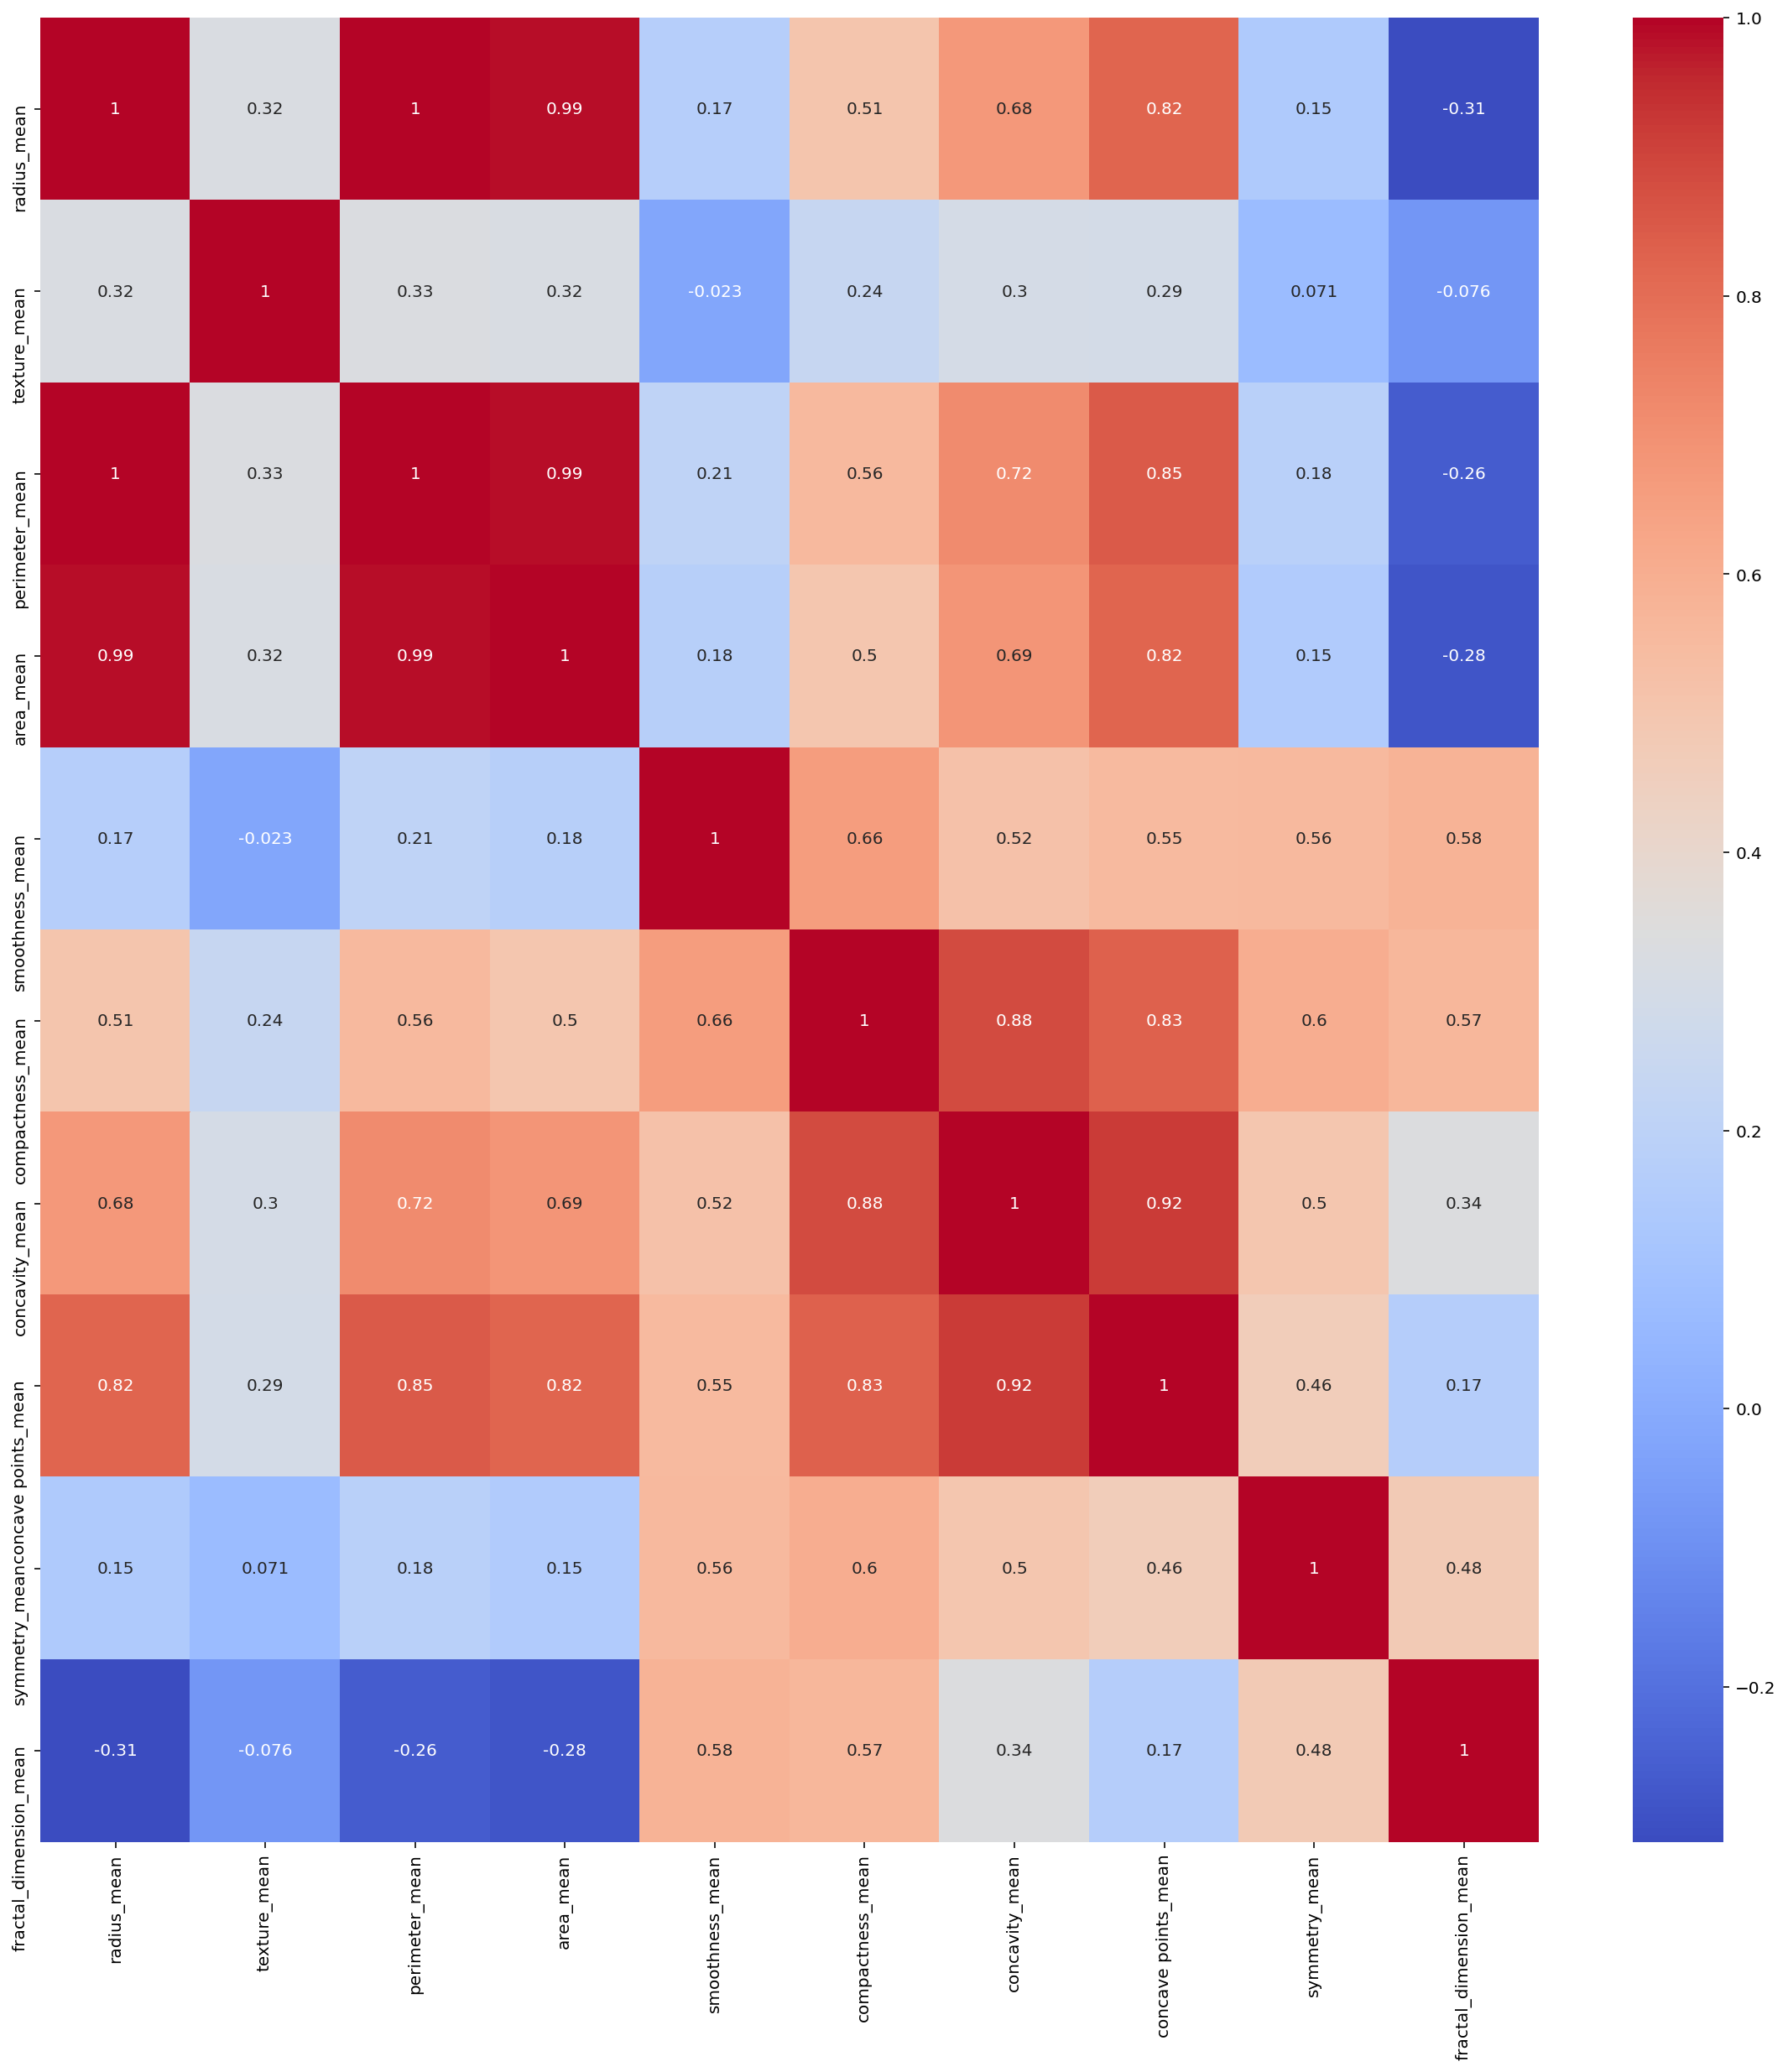

In [28]:
#Plot a heatmap to show correlation in the means dataframe
plt.figure(figsize = (20,20))
sns.heatmap(data_df_mean.corr(),annot = True, cmap = "coolwarm")

### This heatmap shows that the most related datavalues are the radius, the area, and the perimeter, while the least related datavalues are fractal dimensions and the radius, the area, and the perimeter.

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>],
       [<AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>,
        <AxesSubplot:title={'center':'compactness_mean'}>],
       [<AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>],
       [<AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

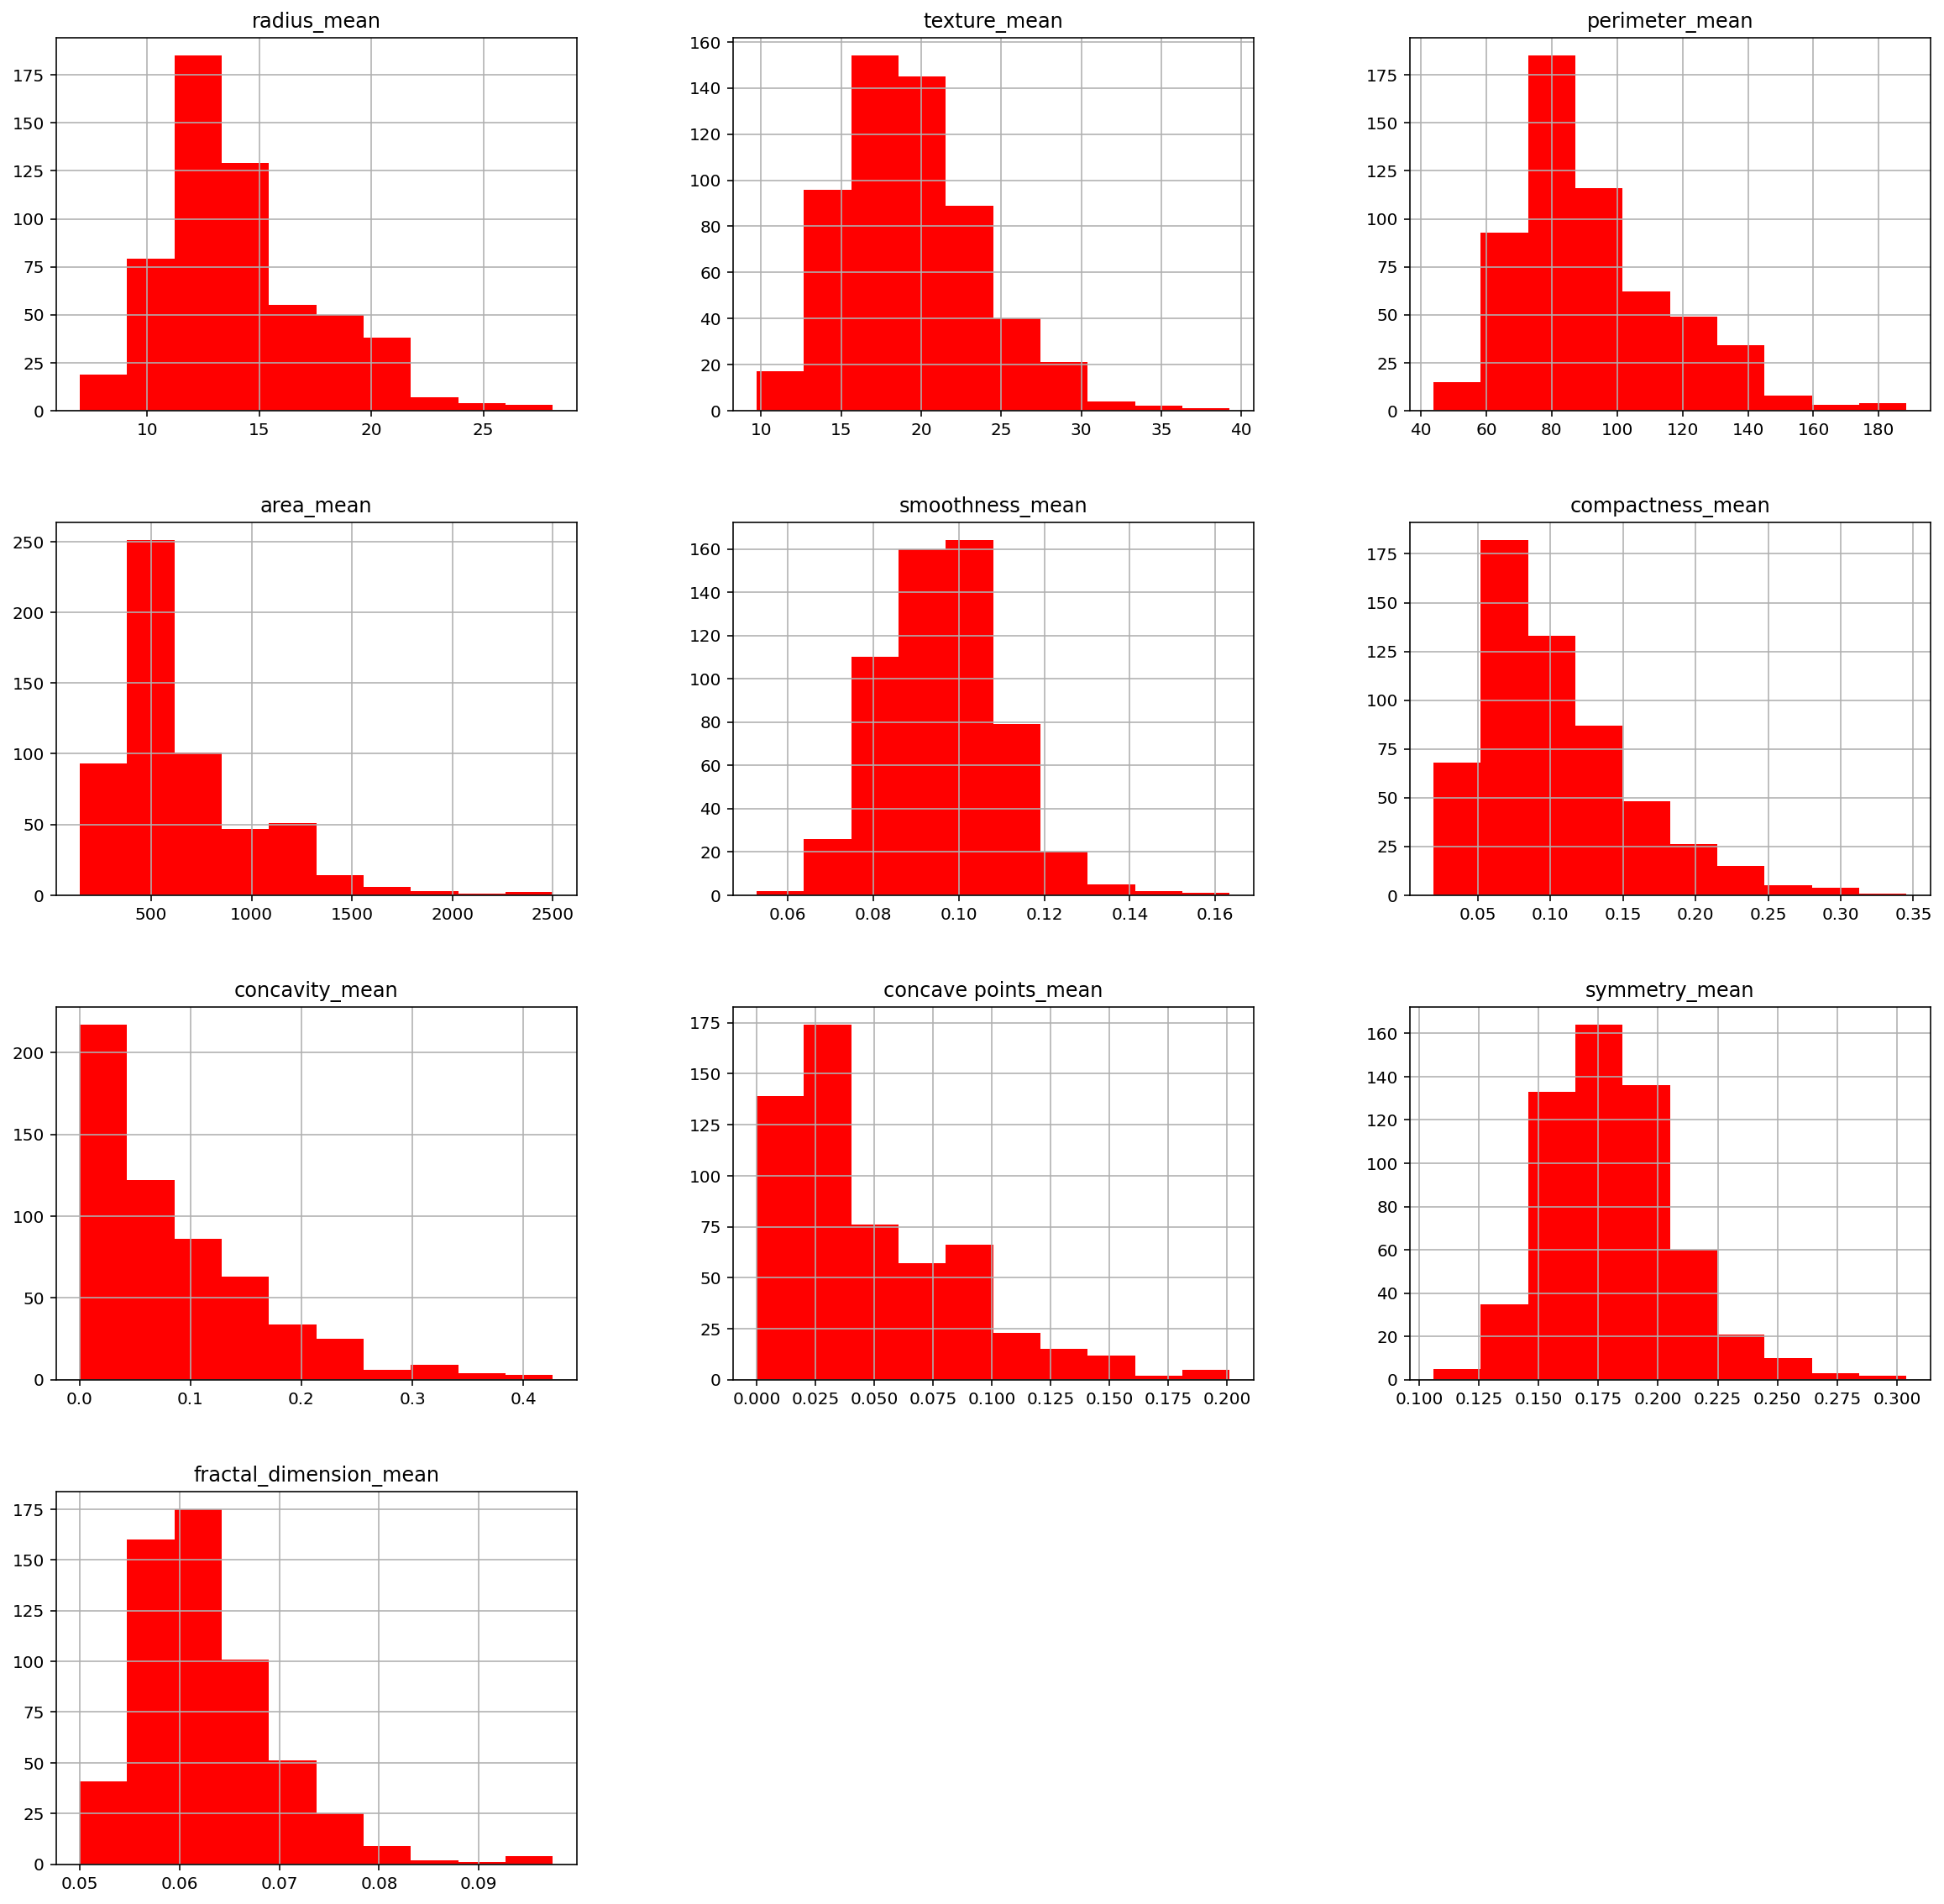

In [29]:
#histogram plots that show the most common values in each aspect of the tumor
data_df_mean.hist(figsize=(20,20),color="red")

### As we see from the above histograms, we see that the data for each attribute of the tumor is either centered at the middle or skewed right

## Here we run the classification and prediction algorithms on the dataset

In [30]:
#separates data into x and y values
y = data_df_mean['diagnosis']
X = data_df_mean.drop(['diagnosis'],axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


### Running LDA on data

In [31]:
#dividing dataset into 80-20% training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [32]:
#importing LDA Class
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#creating object of the LDA class
lda = LDA()

#training lDA model on training data
X_train = lda.fit_transform(X_train,y_train)

#making predicition on dataset
X_test = lda.transform(X_test)

In [33]:
#printing variance ratios
variance_ratio = lda.explained_variance_ratio_
print(variance_ratio)

[1.]


In [34]:
#making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

#training the logistic regression model
lg = LogisticRegression()
lg.fit(X_train, y_train)

#predicting Test set results
y_pred = lg.predict(X_test)

#evaluating results
from sklearn.metrics import accuracy_score

print("The accuracy of the predictions is:",accuracy_score(y_test, y_pred))

The accuracy of the predictions is: 0.9385964912280702


### Running PCA on data

In [35]:
#resets x and y values
#separates data into x and y values
y = data_df_mean['diagnosis']
X = data_df_mean.drop(['diagnosis'],axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [36]:
#converting labels to numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [37]:
#dividing dataset into 80-20% training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [38]:
#applying scaling on training and test datasets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
#importing PCA class
from sklearn.decomposition import PCA

#creating object of PCA class
pca = PCA()

#training PCA model on training data
X_train = pca.fit_transform(X_train)

#making predictions on test data
X_test = pca.transform(X_test)

In [40]:
#printing variance ratios
variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)

[5.42586057e-01 2.55333964e-01 8.89082541e-02 4.91551813e-02
 3.83718861e-02 1.24750660e-02 8.43822952e-03 3.52853395e-03
 1.17531641e-03 2.75115686e-05]


In [41]:
#use one principal component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [42]:
#making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

#training the logistic regression model
lg = LogisticRegression()
lg.fit(X_train, y_train)

#predicting Test set results
y_pred = lg.predict(X_test)


#evaluating results
from sklearn.metrics import accuracy_score

print("The accuracy of the predictions is:",accuracy_score(y_test, y_pred))

The accuracy of the predictions is: 0.9649122807017544


### After running classification on the mean data values, we found PCA to be a better algorithm to fit the data over LCD as the PCA training algorithm had an accuracy score of 0.9649 while the LDA training algorithm had an accuracy score of 0.9386. This relatively high accuracy is good as it shows that the model was able to predict the correct tumor even with a small datasize of 569 datapoints. To improve the model, the best method would be to have more data values as our current datasize limits the number of values we can use for testing our model. For future projects, we could try to compare the values of the worst/largest data and the mean data to see which one provides a better prediction of a tumor. 